<a href="https://colab.research.google.com/github/playeredlc/treinamento-h2ia/blob/master/Aprendizado-Maquina/knn_classificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# K-nearest Neighbors algorithm implementation
# Classification model tested on the Iris dataset.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from collections import Counter

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset

In [3]:
iris_dataset = load_iris()

In [4]:
data = pd.DataFrame(data=iris_dataset.data, columns=iris_dataset.feature_names)
data['target'] = iris_dataset.target

data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Preprocess data

In [5]:
# Data standardization and PCA
X_std = StandardScaler().fit_transform(iris_dataset.data)

pca = PCA(n_components=2)
X_r = pca.fit(X_std).transform(X_std)

X_r.shape

data_pca = pd.DataFrame(data=X_r, columns=['pca1', 'pca2'])
data_pca.head()

,pca1,pca2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


In [6]:
# Split train and test data to evaluate the algorithm later
target = data['target']
features = data_pca

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)
print(f'Train size: {len(X_train)/len(features)}')

Train size: 0.8


# Knn algorithm

In [7]:
class Knn:
  def __init__(self, k):
    self.k = k
    self.X = []
    self.y = []
  
  def fit(self, X_train, y_train):
    self.X = X_train
    self.y = y_train
  
  def predict(self, X_test):
    y_predicted = list()

    for test_point in X_test.values:
      distances = list()
      for data_point in self.X.values:
        dist = self.calc_euclidean_distance(data_point, test_point)
        distances.append(dist)
      
      dist_df = pd.DataFrame(data=distances, columns=['dist'])
      dist_df['target'] = y_train.values
      
      # sort list by 'dist' and get k nearest neighbors
      nn = dist_df.sort_values(by=['dist']).iloc[:5]
      prediction = Counter(nn['target']).most_common(1)[0][0]
      
      y_predicted.append(prediction)

    return y_predicted

  def calc_euclidean_distance(self, p1, p2):
    p1 = np.array(p1)
    p2 = np.array(p2)    
    dist = np.linalg.norm(p1 - p2)

    return dist

In [8]:
knn = Knn(5)
knn.fit(X_train, y_train)
y_hat = knn.predict(X_test)

print(f'Classified values: {y_hat}')

y_hat = pd.Series(data=y_hat)

Classified values: [2, 1, 1, 0, 1, 1, 0, 0, 1, 2, 1, 1, 0, 0, 2, 2, 1, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 1, 0]


# Results

## Visualizing the training data

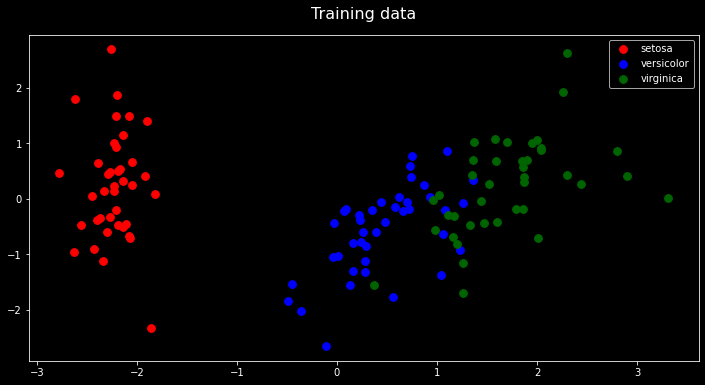

In [9]:
plt.style.use('dark_background')
plt.figure(figsize=[12, 6])
plt.title('Training data', fontsize=16, pad=16)

colors = ['red', 'blue', 'darkgreen']
for color, i, target_name in zip(colors, [0,1,2], iris_dataset.target_names):
  plt.scatter(X_train.values[y_train==i, 0], X_train.values[y_train==i, 1], color=color, label=target_name, s=60)

plt.legend(loc='best')
plt.show()

## Visualizing the test data (true values)



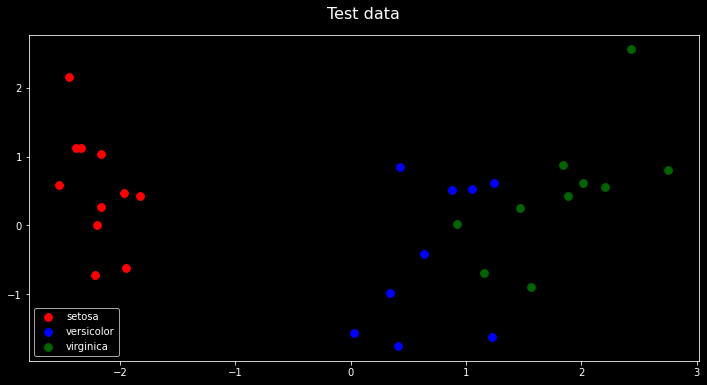

In [10]:
plt.style.use('dark_background')
plt.figure(figsize=[12, 6])
plt.title('Test data', fontsize=16, pad=16)

colors = ['red', 'blue', 'darkgreen']
for color, i, target_name in zip(colors, [0,1,2], iris_dataset.target_names):
  plt.scatter(X_test.values[y_test==i, 0], X_test.values[y_test==i, 1], color=color, label=target_name, s=60)
plt.legend(loc='best')
plt.show()

In [11]:
# get the wrong values to indicate in the plot
not_match = np.where(np.array(y_test.values) != np.array(y_hat.values))[0]
print(f'Items with following indexes did not match: {not_match}')

missed_predictions = []
for idx in not_match:
  missed_predictions.append(X_test.values[idx])


Items with following indexes did not match: [0 1]


## Visualizing the predicted values
Predicted values are ploted with a lighter color;

Missed predictions are marked with a black cross in the plot.

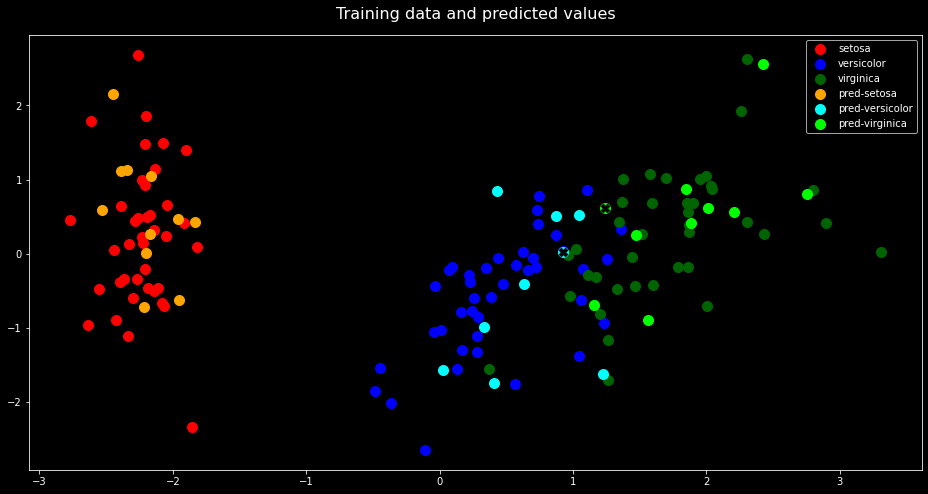

In [12]:
plt.style.use('dark_background')
plt.figure(figsize=[16, 8])
plt.title('Training data and predicted values', fontsize=16, pad=16)

# plot training data
colors = ['red', 'blue', 'darkgreen']
for color, i, target_name in zip(colors, [0,1,2], iris_dataset.target_names):
  plt.scatter(X_train.values[y_train==i, 0], X_train.values[y_train==i, 1], color=color, label=target_name, s=100)

# plot predictions on the testing data
colors = ['orange', 'cyan', 'lime']
target_names = ['pred-setosa', 'pred-versicolor', 'pred-virginica']
for color, i, target_name in zip(colors, [0,1,2], target_names):
  plt.scatter(X_test.values[y_hat==i, 0], X_test.values[y_hat==i, 1], label=target_name, color=color, s=100)

# mark missed predictions with an X
for miss in missed_predictions:
  plt.scatter(miss[0], miss[1], marker='X', c='black', s=70)


plt.legend(loc='best')
plt.show()

## Accuracy Score

In [13]:
acc = accuracy_score(y_true=y_test, y_pred=y_hat)
print(f'Accuracy score: {acc*100:.2f}%')

Accuracy score: 93.33%
